In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

In [ ]:
bikes_df = pd.read_csv("bikes.csv")
bikes_df.head()

,temperature,humidity,windspeed,rentals,temp_class
0,46.716528,0.815969,13.669663,985,Cool
1,48.350239,0.800497,15.199782,801,Cool
2,34.212394,0.592097,13.247558,1349,Cold
3,34.520000,0.623196,11.687963,1562,Cold
4,36.800562,0.624643,13.148281,1600,Cold


**Dependent variable:** rentals  
**Independent variables:** temperature, humidity, windspeed, temp_class  


All variables but *temp_class* are quantitative.  

- The dependent variable is **discrete**.  
- The independent variables are **conntinuous**.
- *temp_class* variable is **categorial**.

In [ ]:
bikes_df['temp_class'].value_counts()

Hot          164
Cool         160
Warm         133
Moderate     127
Cold          72
Very Hot      67
Very Cold      8
Name: temp_class, dtype: int64

#### Grouping was done based on *temp_class*.  


**Very Cold:** Temperature range from 20°C to 30°C.  
**Cold:** Temperature range from 30°C to 40°C.  
**Cool:** Temperature range from 40°C to 50°C.  
**Moderate:** Temperature range from 50°C to 60°C.  
**Warm:** Temperature range from 60°C to 70°C.  
**Hot:** Temperature range from 70°C to 80°C.  
**Very Hot:** Temperature greater than 80°C.  


**Null Hypothesis:** There is no significant difference in bike rentals across different temperature classes.  

**Alternative Hypothesis:** Bike rentals vary across different temperature classes.

In [ ]:
# Group by temperature class and describe rentals
bikes_df.groupby('temp_class')['rentals'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_class,,,,,,,,
Cold,72.0,1887.944444,872.203053,431.0,1336.00,1700.5,2387.75,5375.0
Cool,160.0,3419.075000,1382.813509,605.0,2204.75,3455.0,4319.00,5992.0
Hot,164.0,5693.841463,1366.030252,1115.0,4711.75,5308.5,6930.00,8395.0
Moderate,127.0,4375.125984,1730.349593,22.0,3121.50,4378.0,5665.50,8090.0
Very Cold,8.0,1405.625000,492.193033,822.0,984.75,1472.5,1554.75,2368.0
Very Hot,67.0,5390.910448,1253.990741,3285.0,4366.00,4881.0,6672.50,7592.0
Warm,133.0,5622.766917,1703.933146,1996.0,4359.00,5424.0,7290.00,8714.0


In [ ]:
bikes_df[['rentals']].describe()

,rentals
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


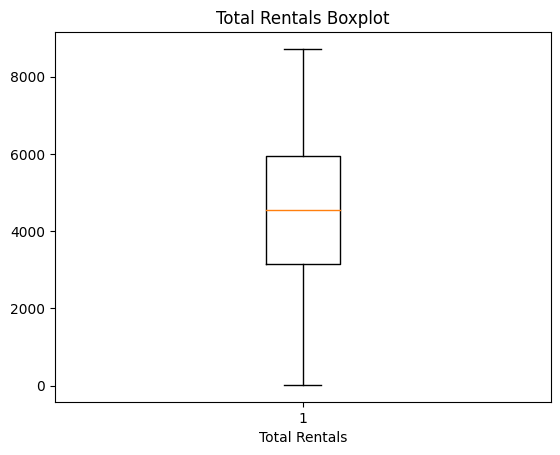

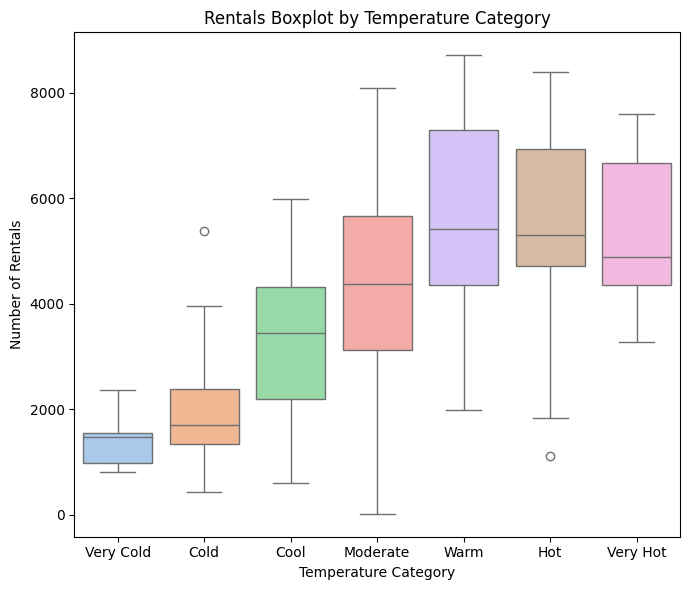

In [ ]:
# Total boxplot
plt.boxplot(bikes_df['rentals'])
plt.title('Total Rentals Boxplot')
plt.xlabel('Total Rentals')
plt.show()

# Define the order of temperature classes
temp_class_order = ['Very Cold', 'Cold', 'Cool', 'Moderate', 'Warm', 'Hot', 'Very Hot']

# Convert 'temp_class' to categorical with defined order
bikes_df['temp_class'] = pd.Categorical(bikes_df['temp_class'], categories=temp_class_order, ordered=True)

# Sort the DataFrame by the defined order of temperature classes
bikes_df_sorted = bikes_df.sort_values(by='temp_class')

# Boxplot by temperature categories
plt.figure(figsize=(7, 6))
sns.boxplot(x='temp_class', y='rentals', data=bikes_df_sorted, palette='pastel')
plt.title('Rentals Boxplot by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Number of Rentals')
plt.tight_layout()

**General Descriptive Statistics:**
The boxplot of bike rentals overall shows that the median rental count is **4548**, with the interquartile range spanning from **3152** to **5956**. Skewness cannot be observed in the overall distribution, suggesting a relatively symmetrical distribution of bike rental counts.
  
  
**Boxplot of Bike Rentals by Temperature Class**  

+ **'Very Cold' Class:**
This class exhibits negative skewness, indicating that the majority of bike rental counts are concentrated towards the higher end of the distribution. Negative skewness suggests that there are relatively fewer instances of extremely high rental counts, with most values clustering towards the lower end.

+ **'Cold', 'Warm', 'Hot', and 'Very Hot' Classes:**
These classes show positive skewness, implying that the distribution of bike rental counts is skewed towards the lower end. Positive skewness indicates that there are fewer instances of very low rental counts, with most values clustering towards higher counts.

+ **'Cold' and 'Hot' Classes:**
These classes show outliers beyond their whiskers. Specifically, the 'cold' class has extremely high values while the 'hot' class has extremely low values and these should be considered as anomalies in the rental counts.

In [ ]:
from scipy.stats import shapiro

# Test for normality
p_value_1 = shapiro(bikes_df['rentals']).pvalue
p_value_5 = shapiro(bikes_df['rentals']).pvalue
p_value_10 = shapiro(bikes_df['rentals']).pvalue

# Print p-values for all significance levels
print(f"p-value (1%): {p_value_1}")
print(f"p-value (5%): {p_value_5}")
print(f"p-value (10%): {p_value_10}\n")

# Interpretation based on p-values
if p_value_1 <= 0.01:
    print("Reject null hypothesis at 1% significance level, data is not normally distributed.")
else:
    print("Fail to reject null hypothesis at 1% significance level, data is normally distributed.")

if p_value_5 <= 0.05:
    print("Reject null hypothesis at 5% significance level, data is not normally distributed.")
else:
    print("Fail to reject null hypothesis at 5% significance level, data is normally distributed.")

if p_value_10 <= 0.10:
    print("Reject null hypothesis at 10% significance level, data is not normally distributed.")
else:
    print("Fail to reject null hypothesis at 10% significance level, data is normally distributed.")

p-value (1%): 2.0795537736262304e-08
p-value (5%): 2.0795537736262304e-08
p-value (10%): 2.0795537736262304e-08

Reject null hypothesis at 1% significance level, data is not normally distributed.
Reject null hypothesis at 5% significance level, data is not normally distributed.
Reject null hypothesis at 10% significance level, data is not normally distributed.


In [ ]:
from scipy.stats import pearsonr

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(bikes_df['temperature'], bikes_df['rentals'])

# Print correlation coefficient and p-values for all significance levels
print(f"Pearson correlation coefficient: {correlation_coefficient:.3f}\n")
print(f"p-value (1%): {p_value}")
print(f"p-value (5%): {p_value}")
print(f"p-value (10%): {p_value}\n")

# Interpretation based on p-values
if p_value <= 0.01:
    print("Reject null hypothesis at 1% significance level\nthere is a significant correlation between temperature and bike rentals.\n")
else:
    print("Fail to reject null hypothesis at 1% significance level,\nthere is no significant correlation between temperature and bike rentals.\n")

if p_value <= 0.05:
    print("Reject null hypothesis at 5% significance level,\nthere is a significant correlation between temperature and bike rentals.\n")
else:
    print("Fail to reject null hypothesis at 5% significance level,\nthere is no significant correlation between temperature and bike rentals.\n")

if p_value <= 0.10:
    print("Reject null hypothesis at 10% significance level,\nthere is a significant correlation between temperature and bike rentals.\n")
else:
    print("Fail to reject null hypothesis at 10% significance level,\nthere is no significant correlation between temperature and bike rentals.\n")

Pearson correlation coefficient: 0.627

p-value (1%): 2.81062239758937e-81
p-value (5%): 2.81062239758937e-81
p-value (10%): 2.81062239758937e-81

Reject null hypothesis at 1% significance level
there is a significant correlation between temperature and bike rentals.

Reject null hypothesis at 5% significance level,
there is a significant correlation between temperature and bike rentals.

Reject null hypothesis at 10% significance level,
there is a significant correlation between temperature and bike rentals.



Text(0.5, 1.0, 'Relationship between Temperature and Bike Rentals')

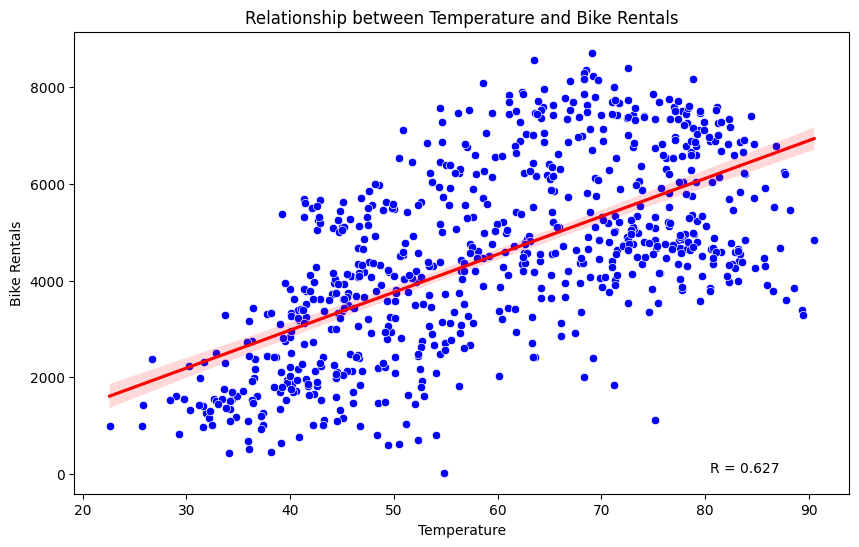

In [ ]:
# Visually demonstrate alternative hypothesis

# Plot data points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bikes_df, x='temperature', y='rentals',color='b')

# Fit regression line
sns.regplot(data=bikes_df, x='temperature', y='rentals', scatter=False, line_kws={"color": "r"})

# Calculate correlation coefficient
correlation_coefficient = bikes_df['temperature'].corr(bikes_df['rentals'])

# Annotate correlation coefficient on the plot
plt.text(x=bikes_df['temperature'].max() - 10, y=bikes_df['rentals'].min() + 10,
         s=f'R = {correlation_coefficient:.3f}', color='k')

# Set plot labels and title
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.title('Relationship between Temperature and Bike Rentals')


Understanding bike rental patterns involves considering various factors beyond temperature. Detailed weather data, including humidity, wind speed, and precipitation, offers a more comprehensive view of weather's influence on rentals, considering its impact on human comfort and outdoor activities. Additionally, analyzing temporal aspects such as time of day and day of the week can unveil peak rental times and weekly trends, shaped by commuting habits, work schedules, and leisure activities.